# The Gamma Distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

In [2]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

The Gamma distribution is defined as 

$$
    \text{Gam}(x\vert \alpha,\beta) = \frac{\beta^\alpha}{\Gamma(\alpha)}x^{\alpha - 1}\exp(-\beta x)
$$

Where
* $\alpha$ is known as the **shape** parameter
* $\beta$ is known as the **rate** parameter

In [3]:
def gamma_dist(x, a, b):
    a = np.array(a).reshape(1, -1, 1)
    b = np.array(b).reshape(1, 1, -1)
    x = x.reshape(-1, 1, 1)
    return b ** a * x ** (a - 1) * np.exp(-b * x) / gamma(a)

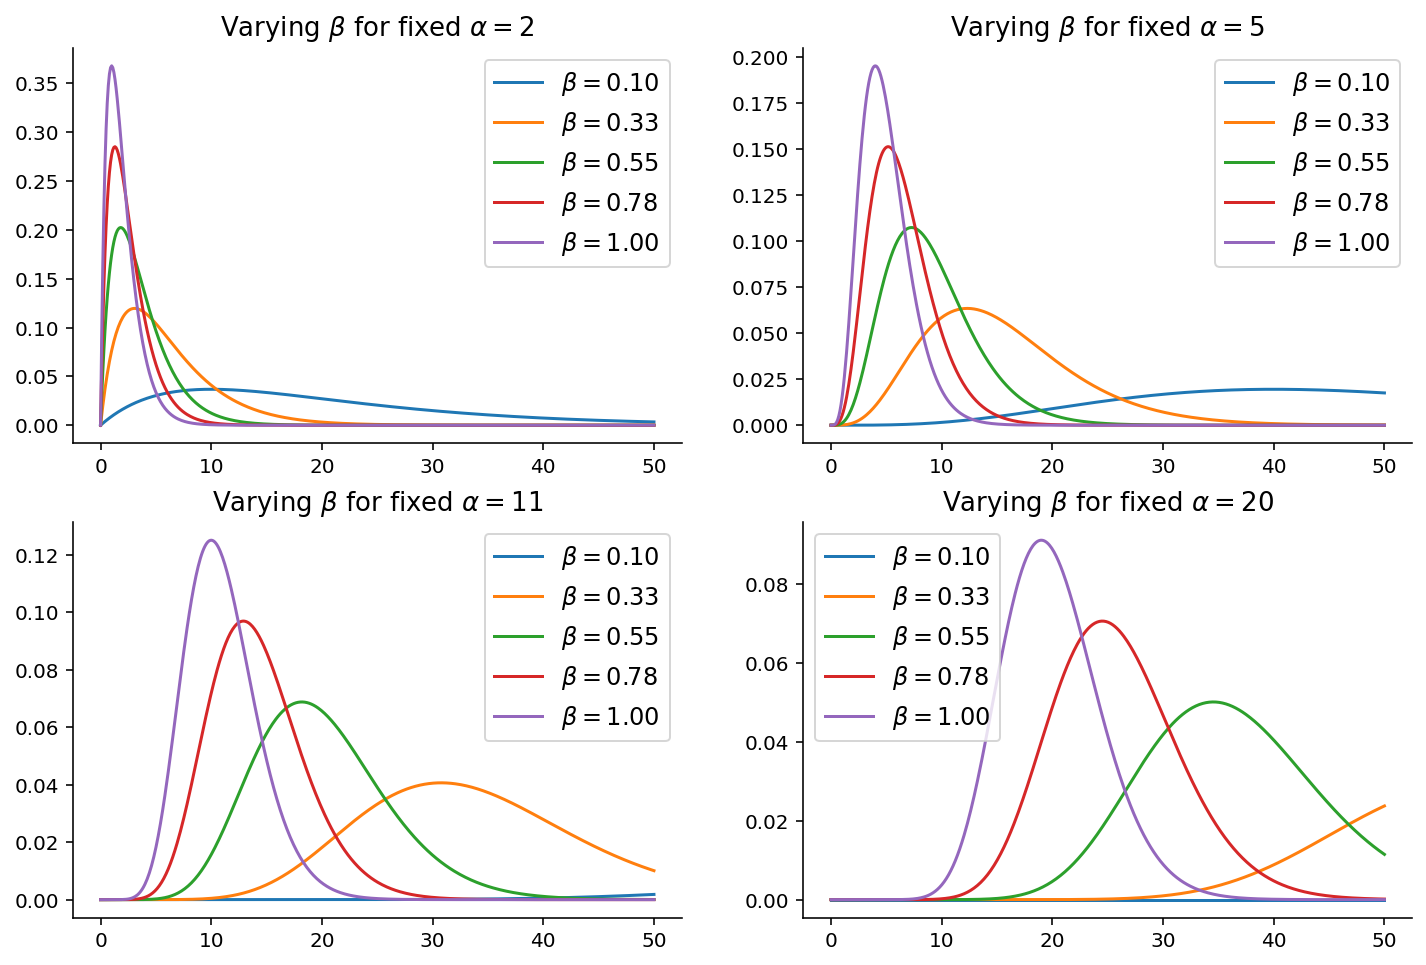

In [4]:
xrange = np.linspace(0, 50, 500)
list_b = np.linspace(0.1, 1, 5)

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
ax = ax.ravel()
list_a = [2, 5, 11, 20]
for a, axi in zip(list_a, ax):
    pdfs = gamma_dist(xrange, a, list_b).squeeze()
    legends = axi.plot(xrange, pdfs)
    labels = [rf"$\beta={b:0.2f}$" for b in list_b]
    axi.legend(legends, labels, fontsize=12)
    axi.set_title(rf"Varying $\beta$ for fixed $\alpha={a}$", fontsize=13);

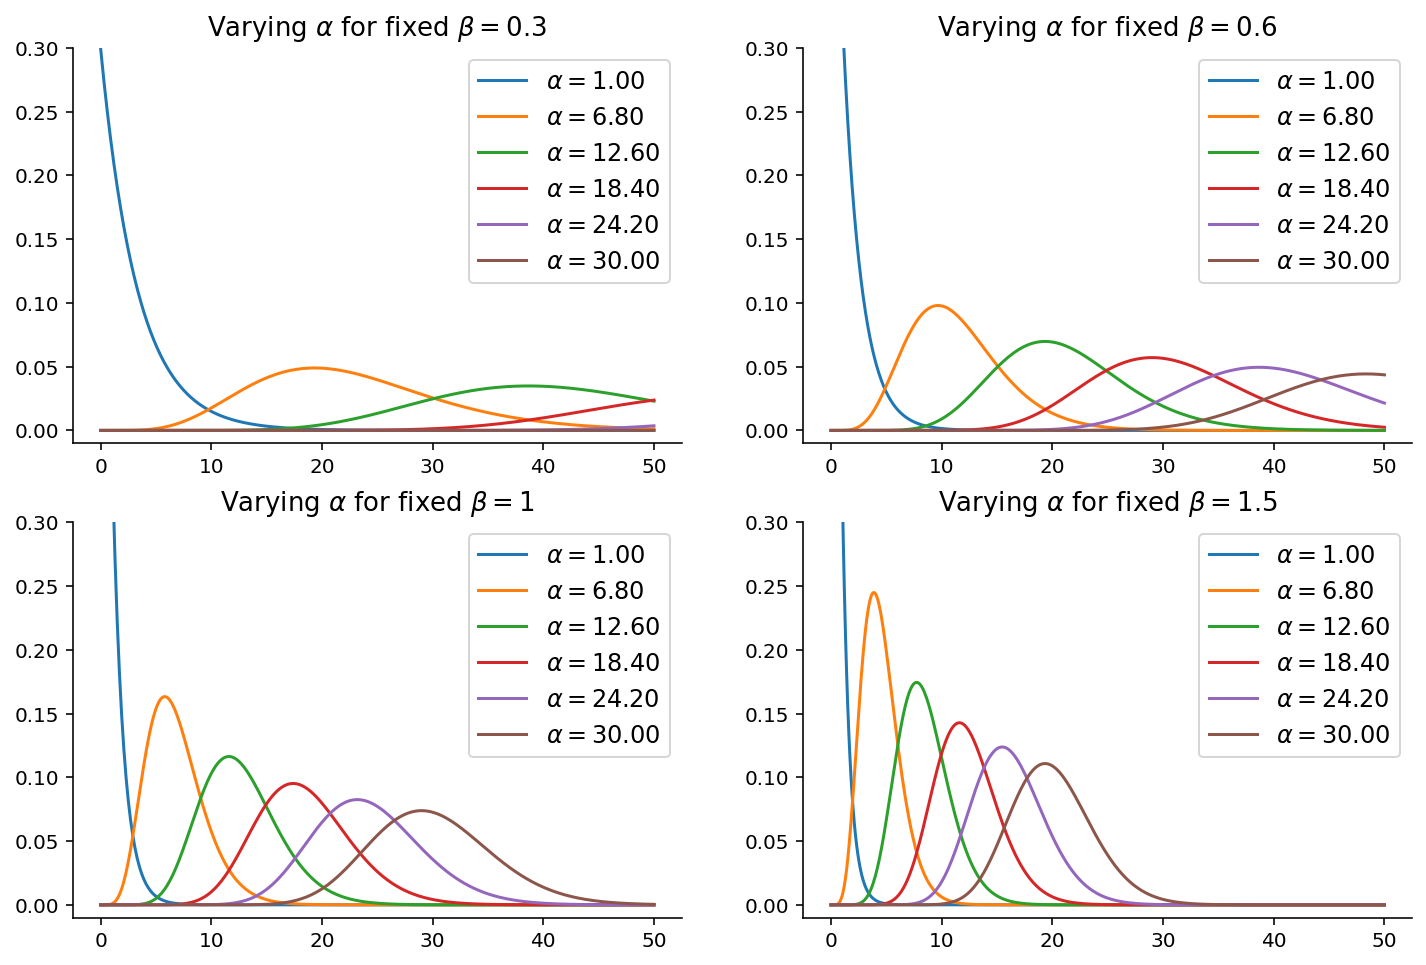

In [5]:
xrange = np.linspace(0, 50, 500)
list_a = np.linspace(1, 30, 6)

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
ax = ax.ravel()
list_b = [0.3, 0.6, 1, 1.5]
for b, axi in zip(list_b, ax):
    pdfs = gamma_dist(xrange, list_a, b).squeeze()
    legends = axi.plot(xrange, pdfs)
    labels = [rf"$\alpha={a:0.2f}$" for a in list_a]
    axi.legend(legends, labels, fontsize=12)
    axi.set_title(rf"Varying $\alpha$ for fixed $\beta={b}$", fontsize=13)
    axi.set_ylim(-0.01, 0.3)

From the graphs above we can see that
1. $\beta$ controls the *general variance*
2. $\alpha$ controls the *displacement* of the distribution, subject to the restriction that $x>0$